In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
# Load dataset (ensure the file path is correct)
df = pd.read_excel(f'Audio_Team(11-26).xlsx')

In [5]:
# Extract the 'Answer' and 'Strength_N' columns
text_data = df['Answer']  # Using 'Answer' for the textual data
strength_numeric = df['Strength_N']  # Numeric strength (-1, 0, 1)

In [6]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame for easier viewing (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   000   10   1d  1d2d   2d   3d  3rd  3x3  6x6  able  ...  words  working  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0      0.0   

   works  would  yeah  yes  you  your      zero  zeros  
0    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  
1    0.0    0.0   0.0  0.0  0.0   0.0  0.148378    0.0  
2    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  
3    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  
4    0.0    0.0   0.0  0.0  0.0   0.0  0.000000    0.0  

[5 rows x 868 columns]


In [7]:
# Example: Work with one feature, say 'yeah' or any other common word
# Ensure the word exists in the vocabulary before trying to access it
if 'yeah' in vectorizer.get_feature_names_out():
    a = tfidf_df['yeah'].to_numpy()
else:
    a = np.zeros(len(df))  # Fallback if the word isn't in the dataset

# Use 'Strength_N' values (this replaces Numeric_Label)
b = strength_numeric.to_numpy()

# Convert to NumPy arrays
a = np.array(a)
b = np.array(b)

In [8]:
# Summation Unit function (same as original)
def summation_unit(inputs, weights, bias=0):
    """
    Compute the weighted sum of the inputs.

    Parameters:
    - inputs: list or array of input values.
    - weights: list or array of weights corresponding to the inputs.
    - bias: optional bias term (default is 0).

    Returns:
    - Weighted sum (scalar).
    """
    return sum(i * w for i, w in zip(inputs, weights)) + bias

# Summation output
x = summation_unit(a, b)

In [9]:
# Activation functions (unchanged)
import math

def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + math.exp(-x))

def tanh_activation(x):
    return math.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x >= 0 else alpha * x

# Apply activations
print("Step Activation:", step_activation(x))
print("Bipolar Step Activation:", bipolar_step_activation(x))
print("Sigmoid Activation:", sigmoid_activation(x))
print("TanH Activation:", tanh_activation(x))
print("ReLU Activation:", relu_activation(x))
print("Leaky ReLU Activation:", leaky_relu_activation(x))

# You can also add mappings from 'Strength' to 'Strength_N' if needed
strength_mapping = {'Low': -1, 'Medium': 0, 'High': 1}
df['Strength_N'] = df['Strength'].map(strength_mapping)

Step Activation: 0
Bipolar Step Activation: -1
Sigmoid Activation: 0.23021064019280724
TanH Activation: -0.8358141622579969
ReLU Activation: 0
Leaky ReLU Activation: -0.012071222019969312


In [10]:
import matplotlib.pyplot as plt

In [11]:
# Mean Squared Error
def mean_squared_error(targets, predictions):
    """
    Compute the mean squared error (MSE) between the true targets and the predictions.
    MSE is used to measure the average squared difference between actual and predicted values.
    """
    return sum((t - p) ** 2 for t, p in zip(targets, predictions)) / len(targets)

# Absolute Error
def absolute_error(targets, predictions):
    """
    Compute the absolute error between the true targets and the predictions.
    It gives the average absolute difference between actual and predicted values.
    """
    return sum(abs(t - p) for t, p in zip(targets, predictions)) / len(targets)

Converged after 131 epochs.


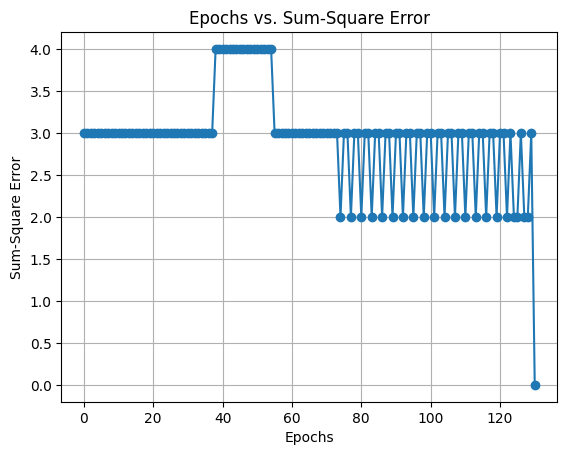

Prediction for [1, 1]: 1


In [12]:
# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        """
        Initialize the perceptron with:
        - input_size: number of input features.
        - learning_rate: rate at which the perceptron updates its weights.
        """
        # Initialize weights (W1, W2) and bias (W0)
        self.weights = np.array([10, 0.2, -0.75])  # Initial weights (W0, W1, W2)
        self.learning_rate = learning_rate
        self.bias = self.weights[0]  # Bias is the first weight (W0)
        # The rest of the weights for inputs are initialized as given
        self.weights = np.insert(self.weights[1:], 0, self.bias)  # Insert bias as the first weight

    def step_function(self, x):
        """
        Step activation function.
        It returns 1 if x >= 0, otherwise 0. 
        This is commonly used in binary classification tasks.
        """
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        """
        Make predictions based on the current weights and the input data.
        The weighted sum of inputs is computed, and the step function is applied.
        """
        # Compute the weighted sum (dot product of inputs and weights, plus bias)
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # Apply the step function to the weighted sum
        return self.step_function(weighted_sum)

    def update_weights(self, inputs, error):
        """
        Update the weights and bias using the perceptron learning rule.
        The rule adjusts weights based on the error and input values.
        """
        # Update weights based on the error
        self.weights[1:] += self.learning_rate * error * inputs
        # Update the bias (weight[0]) separately
        self.weights[0] += self.learning_rate * error

    def train(self, training_inputs, labels, max_epochs=1000, convergence_threshold=0.002):
        """
        Train the perceptron for a given number of epochs or until convergence.
        Convergence occurs when the total sum-square error is less than the threshold.
        """
        epoch_errors = []  # List to store sum of squared errors for each epoch
        for epoch in range(max_epochs):
            total_error = 0  # Initialize total error for this epoch
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)  # Get the perceptron's prediction
                error = label - prediction  # Calculate the error (target - prediction)
                self.update_weights(inputs, error)  # Update the weights based on the error
                total_error += error ** 2  # Accumulate squared error
            epoch_errors.append(total_error)  # Track the error for this epoch
            if total_error <= convergence_threshold:  # Check for convergence
                print(f"Converged after {epoch + 1} epochs.")  # Early stop if converged
                break
        return epoch_errors  # Return the list of errors for each epoch

# Define training data for AND gate logic
training_inputs = np.array([
    [1, 0],  # Input pattern 1
    [1, 1],  # Input pattern 2
    [0, 1],  # Input pattern 3
    [0, 0]   # Input pattern 4
])

# Define labels for AND gate (truth values)
labels = np.array([0, 1, 0, 0])

# Initialize and train the perceptron
perceptron = Perceptron(input_size=2)
epoch_errors = perceptron.train(training_inputs, labels)

# Plot error vs. epochs to visualize learning progress
plt.plot(range(len(epoch_errors)), epoch_errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid(True)
plt.show()

# Test the perceptron with new data
test_inputs = np.array([1, 1])  # Example test case
prediction = perceptron.predict(test_inputs)  # Make a prediction
print("Prediction for [1, 1]:", prediction)

In [15]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.05, activation_function='step'):
        """
        Initialize the perceptron with:
        - input_size: number of input features.
        - learning_rate: learning rate for weight updates.
        - activation_function: type of activation function ('step', 'bi-polar', 'sigmoid', 'relu').
        """
        # Initialize weights randomly, including bias
        # Bias is the first weight
        self.weights = np.random.uniform(-0.01, 0.01, input_size + 1)  # Bias initialized to a small random value
        self.learning_rate = learning_rate
        self.activation_function = activation_function
    
    def activation(self, x):
        """Compute the activation based on the chosen activation function."""
        if self.activation_function == 'step':
            return 1 if x >= 0 else 0
        elif self.activation_function == 'bi-polar':
            return 1 if x >= 0 else -1
        elif self.activation_function == 'sigmoid':
            return 1 / (1 + math.exp(-x))
        elif self.activation_function == 'relu':
            return max(0, x)
        else:
            raise ValueError("Unsupported activation function")
    
    def predict(self, inputs):
        """
        Predict the output for given inputs.
        Inputs should be a NumPy array.
        """
        # Calculate the weighted sum (including bias)
        weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
        # Apply the activation function
        return self.activation(weighted_sum)
    
    def update_weights(self, inputs, error):
        """
        Update the weights based on the error and inputs.
        """
        if self.activation_function == 'sigmoid':
            # Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
            prediction = self.activation(np.dot(inputs, self.weights[1:]) + self.weights[0])
            error *= prediction * (1 - prediction)
        elif self.activation_function == 'relu':
            # Derivative of ReLU: 1 if x > 0 else 0
            weighted_sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
            error *= 1.0 if weighted_sum > 0 else 0.0

        # Update weights and bias
        self.weights[1:] += self.learning_rate * error * inputs
        self.weights[0] += self.learning_rate * error  # Update bias separately
    
    def train(self, training_inputs, labels, max_epochs=1000, convergence_threshold=0.002):
        """
        Train the perceptron using the provided training data.
        - training_inputs: NumPy array of shape (n_samples, n_features).
        - labels: NumPy array of shape (n_samples,).
        - max_epochs: maximum number of training epochs.
        - convergence_threshold: threshold for sum of squared errors to stop training early.
        Returns a list of sum-squared errors for each epoch.
        """
        epoch_errors = []
        for epoch in range(max_epochs):
            total_error = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.update_weights(inputs, error)
                total_error += error ** 2
            epoch_errors.append(total_error)
            if total_error <= convergence_threshold:
                print(f"{self.activation_function} activation converged after {epoch + 1} epochs.")
                break
        return epoch_errors
    
    def evaluate(self, test_inputs, test_labels):
        """
        Evaluate the perceptron on the test data.
        Returns accuracy, mean squared error, and absolute error.
        """
        predictions = [self.predict(inputs) for inputs in test_inputs]
        accuracy = np.mean(np.array(predictions) == test_labels)
        mse = mean_squared_error(test_labels, predictions)
        abs_err = absolute_error(test_labels, predictions)
        return accuracy, mse, abs_err


Training with step activation function...
step activation converged after 8 epochs.

Training with bi-polar activation function...

Training with sigmoid activation function...

Training with relu activation function...
relu activation converged after 307 epochs.


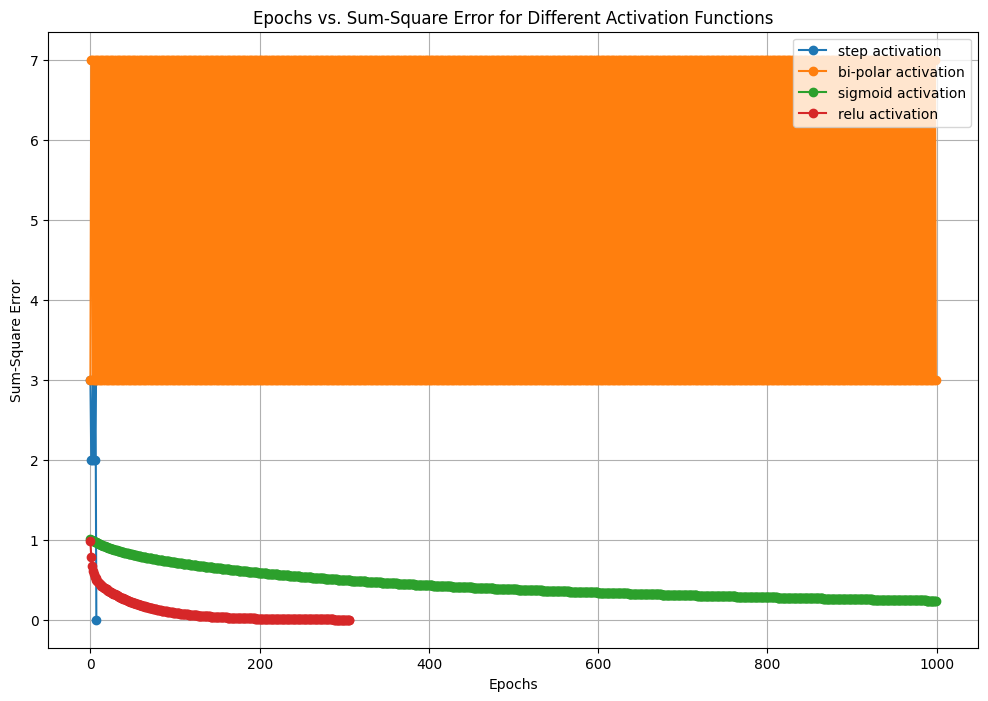

In [17]:
# Initialize and train perceptrons with different activation functions
activation_functions = ['step', 'bi-polar', 'sigmoid', 'relu']
errors = {}

for func in activation_functions:
    print(f"\nTraining with {func} activation function...")
    # Use training_inputs instead of X_train and labels instead of y_train
    perceptron = Perceptron(input_size=training_inputs.shape[1], activation_function=func, learning_rate=0.05)
    epoch_errors = perceptron.train(training_inputs, labels, max_epochs=1000, convergence_threshold=0.002)
    errors[func] = epoch_errors

# Plot error vs. epochs for each activation function
plt.figure(figsize=(12, 8))
for func, epoch_errors in errors.items():
    plt.plot(range(len(epoch_errors)), epoch_errors, marker='o', label=f'{func} activation')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error for Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import numpy as np

# Ensure mean_squared_error is properly defined
def mean_squared_error(targets, predictions):
    """
    Calculate the mean squared error between targets and predictions.

    Parameters:
    - targets: List or array of true values.
    - predictions: List or array of predicted values.

    Returns:
    - Mean squared error (float).
    """
    return np.mean((np.array(targets) - np.array(predictions)) ** 2)

# Example usage of xor_gate function and mean_squared_error
def summation_unit(inputs, weights, bias=0):
    """
    Compute the weighted sum of the inputs.

    Parameters:
    - inputs: list or array of input values.
    - weights: list or array of weights corresponding to the inputs.
    - bias: optional bias term (default is 0).

    Returns:
    - Weighted sum (scalar).
    """
    return np.dot(inputs, weights) + bias

def xor_gate(inputs, weights, activation_function, bias=0):
    """
    Calculate the XOR-like logic using the summation unit and activation function.

    Parameters:
    - inputs: Array of input features (e.g., TF-IDF vectors or XOR inputs).
    - weights: Weights associated with the inputs.
    - activation_function: The activation function to apply (e.g., step, sigmoid, etc.).
    - bias: Optional bias term.

    Returns:
    - Output after applying the activation function.
    """
    # Calculate the summation
    weighted_sum = summation_unit(inputs, weights, bias)

    # Apply the activation function
    return activation_function(weighted_sum)

# Example weights (for XOR-like logic)
weights = [0.5, 0.5]  # Weights for the inputs (no bias here)
bias = -0.7           # Bias term
inputs = [1, 0]       # Example inputs

# Using Step Activation function (from the previous code)
output = xor_gate(inputs, weights, step_activation, bias)
print(f"XOR-like Output (Step Activation): {output}")

# Using Sigmoid Activation function (for more complex cases like TF-IDF data)
output_sigmoid = xor_gate(inputs, weights, sigmoid_activation, bias)
print(f"XOR-like Output (Sigmoid Activation): {output_sigmoid}")

# Example for error calculation (mean squared error)
predictions = [1, 0, 1, 0]  # Example predictions
targets = [1, 0, 1, 0]      # Example targets
error = mean_squared_error(predictions, targets)  # Call the correctly defined function
print(f"Mean Squared Error: {error}")


XOR-like Output (Step Activation): 0
XOR-like Output (Sigmoid Activation): 0.45016600268752216
Mean Squared Error: 0.0


In [19]:
import numpy as np

# Data
X = np.array([[20, 6, 2, 386],
              [16, 3, 6, 289],
              [27, 6, 2, 393],
              [19, 1, 2, 110],
              [24, 4, 2, 280],
              [22, 1, 5, 167],
              [15, 4, 2, 271],
              [18, 4, 2, 274],
              [21, 1, 4, 148],
              [16, 2, 4, 198]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X.shape[1])
bias = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the perceptron
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward pass
        linear_output = np.dot(X[i], weights) + bias
        prediction = sigmoid(linear_output)

        # Compute error
        error = y[i] - prediction

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {np.mean((y - sigmoid(np.dot(X, weights) + bias))**2)}')

# Make predictions
def predict(X):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output) > 0.5

# Testing the model
predictions = predict(X)
print("Predictions:", predictions)
print("Actual Labels:", y)


Epoch 0: Loss = 0.6
Epoch 100: Loss = 0.6
Epoch 200: Loss = 0.39999999998254887
Epoch 300: Loss = 0.1999999998813591
Epoch 400: Loss = 0.1
Epoch 500: Loss = 0.3
Epoch 600: Loss = 3.492382207998652e-08
Epoch 700: Loss = 3.4734082479528716e-08
Epoch 800: Loss = 3.454597479450822e-08


C:\Users\vivek\AppData\Local\Temp\ipykernel_5008\2450989818.py:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 900: Loss = 3.435947940626133e-08
Predictions: [ True  True  True False  True False  True  True False False]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


In [20]:

import numpy as np

# Data
X = np.array([[20, 6, 2, 386],
              [16, 3, 6, 289],
              [27, 6, 2, 393],
              [19, 1, 2, 110],
              [24, 4, 2, 280],
              [22, 1, 5, 167],
              [15, 4, 2, 271],
              [18, 4, 2, 274],
              [21, 1, 4, 148],
              [16, 2, 4, 198]])

y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(X.shape[1])
bias = np.random.randn()

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training the perceptron
for epoch in range(epochs):
    for i in range(X.shape[0]):
        # Forward pass
        linear_output = np.dot(X[i], weights) + bias
        prediction = sigmoid(linear_output)

        # Compute error
        error = y[i] - prediction

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {np.mean((y - sigmoid(np.dot(X, weights) + bias))**2)}')

# Predictions with perceptron
def predict(X):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output) > 0.5

predictions = predict(X)
print("Perceptron Predictions:", predictions)
print("Actual Labels:", y)

# Add a bias term (column of 1s) to the input matrix for pseudo-inverse method
X_biased = np.c_[np.ones(X.shape[0]), X]

# Calculate the pseudo-inverse of X
X_pseudo_inv = np.linalg.pinv(X_biased)

# Calculate weights using the pseudo-inverse
weights_pseudo = np.dot(X_pseudo_inv, y)

# Prediction function using pseudo-inverse
def predict_pseudo(X, weights):
    X_biased = np.c_[np.ones(X.shape[0]), X]
    linear_output = np.dot(X_biased, weights)
    return sigmoid(linear_output) > 0.5

# Testing the model with pseudo-inverse weights
predictions_pseudo = predict_pseudo(X, weights_pseudo)
print("Pseudo-Inverse Predictions:", predictions_pseudo)
print("Actual Labels:", y)

Epoch 0: Loss = 0.6
Epoch 100: Loss = 0.6
Epoch 200: Loss = 0.39999999998254887
Epoch 300: Loss = 0.1999999998813591
Epoch 400: Loss = 0.1
Epoch 500: Loss = 0.3
Epoch 600: Loss = 3.492382207998652e-08
Epoch 700: Loss = 3.4734082479528716e-08


C:\Users\vivek\AppData\Local\Temp\ipykernel_5008\655438553.py:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 800: Loss = 3.454597479450822e-08
Epoch 900: Loss = 3.435947940626133e-08
Perceptron Predictions: [ True  True  True False  True False  True  True False False]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]
Pseudo-Inverse Predictions: [ True  True  True  True  True  True  True  True  True  True]
Actual Labels: [1 1 1 0 1 0 1 1 0 0]


In [21]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize parameters
np.random.seed(42)  # For reproducibility
alpha = 0.05  # Learning rate
max_iterations = 1000
convergence_threshold = 0.002

# Assume training_inputs is your TF-IDF matrix and labels is the Strength_N column
inputs = training_inputs  # TF-IDF matrix from 'Question' + 'Answer' columns
targets = labels.reshape(-1, 1)  # Strength_N column reshaped for compatibility

# Randomly initialize weights
input_layer_size = inputs.shape[1]  # Number of features in the TF-IDF matrix
hidden_layer_size = 2  # Number of neurons in the hidden layer (can be tuned)
output_layer_size = 1  # Since we're predicting Strength_N (one output)

V = np.random.uniform(-0.5, 0.5, (input_layer_size, hidden_layer_size))  # Weights for input to hidden layer
W = np.random.uniform(-0.5, 0.5, (hidden_layer_size, output_layer_size))  # Weights for hidden layer to output

# Training loop
for iteration in range(max_iterations):
    # Forward propagation
    H_input = np.dot(inputs, V)  # Input to hidden layer
    H_output = sigmoid(H_input)  # Output from hidden layer

    O_input = np.dot(H_output, W)  # Input to output layer
    O_output = sigmoid(O_input)  # Final output

    # Calculate the error
    error = targets - O_output
    mean_squared_error = np.mean(error ** 2)

    # Check for convergence
    if mean_squared_error <= convergence_threshold:
        print(f"Converged at iteration {iteration + 1} with error {mean_squared_error}")
        break

    # Backward propagation
    delta_O = error * sigmoid_derivative(O_output)
    delta_H = delta_O.dot(W.T) * sigmoid_derivative(H_output)

    # Update weights
    W += alpha * H_output.T.dot(delta_O)
    V += alpha * inputs.T.dot(delta_H)

# Print final weights
print("Final weights between input and hidden layer (V):")
print(V)
print("\nFinal weights between hidden and output layer (W):")
print(W)

# Test the network
print("\nTesting the trained network:")
for i in range(len(inputs)):
    H_input = np.dot(inputs[i], V)
    H_output = sigmoid(H_input)
    O_input = np.dot(H_output, W)
    O_output = sigmoid(O_input)
    print(f"Input {i+1}: Predicted Output: {O_output.round()}, Expected Output: {targets[i]}")


Final weights between input and hidden layer (V):
[[-1.03669502 -0.41868096]
 [-0.63935701 -0.80389562]]

Final weights between hidden and output layer (W):
[[-1.75435368]
 [-1.31071564]]

Testing the trained network:
Input 1: Predicted Output: [0.], Expected Output: [0]
Input 2: Predicted Output: [0.], Expected Output: [1]
Input 3: Predicted Output: [0.], Expected Output: [0]
Input 4: Predicted Output: [0.], Expected Output: [0]
